In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [11]:
file_loc = './otu_table_L4.txt'
with open(file_loc, 'r') as file:
    newfile = re.sub('D_0__', 'K:', file.read())
    newfile = re.sub('D_1__', 'P:', newfile)
    newfile = re.sub('D_2__', 'C:', newfile)
    newfile = re.sub('D_3__', 'O:', newfile)
    with open('./renamed_'+file_loc[-6:], 'w') as output:
        output.write(newfile)

In [12]:
df = pd.read_csv('./renamed_'+file_loc[-6:],
                 header=1,
                 index_col=0,
                 sep='\t')
cols = []
for num in range(8,38):
    cols.append('515rcbc' + str(num))
df = df[cols]
df = df*100
df

,515rcbc8,515rcbc9,515rcbc10,515rcbc11,515rcbc12,515rcbc13,515rcbc14,515rcbc15,515rcbc16,515rcbc17,...,515rcbc28,515rcbc29,515rcbc30,515rcbc31,515rcbc32,515rcbc33,515rcbc34,515rcbc35,515rcbc36,515rcbc37
#OTU ID,,,,,,,,,,,,,,,,,,,,,
K:Archaea;P:Crenarchaeota;C:Bathyarchaeia;Ambiguous_taxa,0.000000,0.000000,0.000000,0.001017,0.000067,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K:Archaea;P:Diapherotrites;C:Micrarchaeia;O:uncultured archaeon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K:Archaea;P:Euryarchaeota;C:Methanobacteria;O:Methanobacteriales,0.000000,0.003013,0.000000,0.000000,0.001613,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K:Archaea;P:Euryarchaeota;C:Methanomicrobia;O:Methanocellales,0.000000,0.004519,0.000000,0.000000,0.000067,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K:Archaea;P:Euryarchaeota;C:Methanomicrobia;O:Methanomicrobiales,0.000000,0.000000,0.000000,0.000000,0.000067,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K:Archaea;P:Euryarchaeota;C:Methanomicrobia;O:Methanosarcinales,0.000000,0.000000,0.000547,0.000000,0.002487,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K:Archaea;P:Euryarchaeota;C:Thermoplasmata;O:Marine Group II,0.000000,0.001506,0.000000,0.000000,0.000000,0.000000,0.000801,0.003739,0.000000,0.013859,...,0.000868,0.001800,0.042774,0.000000,0.000000,0.000000,0.000000,0.005663,0.000000,0.000000
K:Archaea;P:Euryarchaeota;C:Thermoplasmata;O:Methanomassiliicoccales,0.000000,0.000000,0.000547,0.000000,0.000269,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.036137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
K:Archaea;P:Nanoarchaeaeota;C:Woesearchaeia;O:Candidatus Nomurabacteria bacterium RIFCSPLOWO2_02_FULL_42_17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
def plot_heatmap(dataframe, title=False, savename=False, dpi=100):
    matplotlib.rcParams.update({'font.size': 25})
    fig, ax = plt.subplots(figsize=(30,150))
    sns.heatmap(ax=ax, 
                data=dataframe, 
               yticklabels=True, cbar=False,)
    for label in ax.get_yticklabels():
        label.set_size(14)
    if title:
        plt.title(title, fontsize=40)
    plt.ylabel('Phylum')
    plt.xlabel('Sample')
    if savename:
        plt.savefig(savename, bbox_inches='tight',dpi=dpi)
    plt.show()


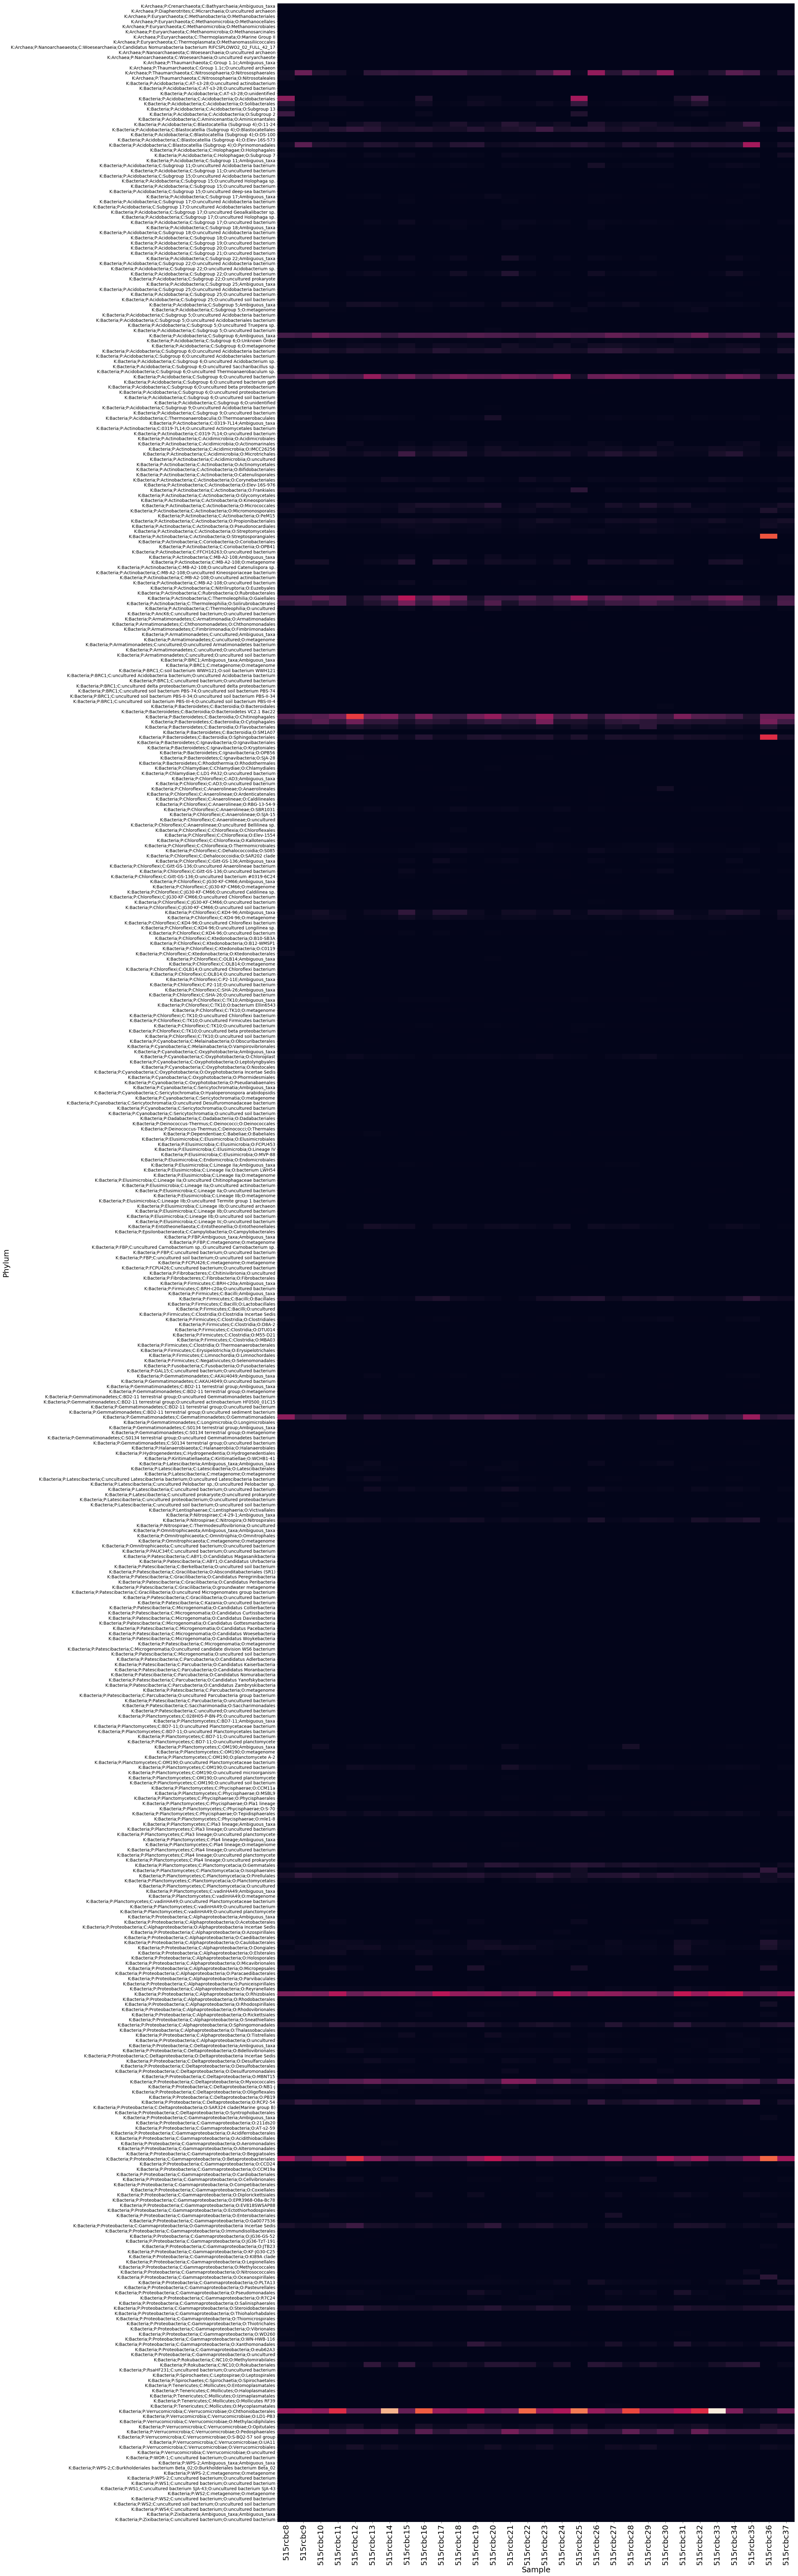

In [15]:
plot_heatmap(df, savename='./L2_plot.png', dpi=50)

In [10]:
top = df[['total_perc']].sum(axis=1).sort_values(ascending=False)[:10]

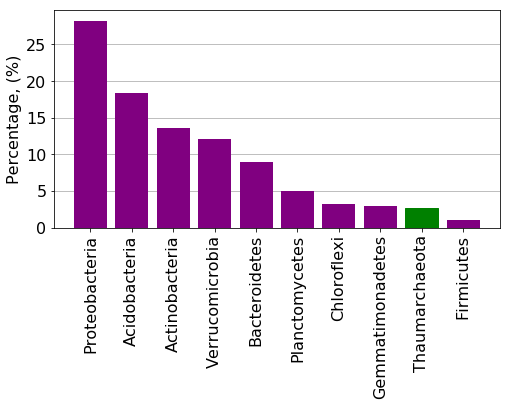

96.15649639907794


In [16]:
def plot_bar(ser):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(8,4))
    val = ser.values
    xlabels = []
    for phyl in ser.index.tolist():
        xlabels.append(phyl.split(';P:')[1])
    bars = ax.bar(xlabels,val, color='purple')
    bars[8].set_color('green')
    ax.set_xticklabels(xlabels)
    plt.ylabel('Percentage, (%)', fontsize=16)
    plt.xticks(rotation=90, fontsize=16)
    ax.set_axisbelow(True)
    plt.grid(axis='y')
    plt.savefig('./top_10.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(val.sum())
plot_bar(top)